# Tarea: Modelado

**Sonia Mendizábal 105720**

07 de noviembre de 2016

In [1]:
import pandas as pda
import numpy as np
import feather

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Lectura de datos

In [2]:
digits = load_digits()
print( digits.images.shape)
X = digits.data
X.shape
y = digits.target
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(1797, 8, 8)


## Aprendizaje supervisado

### Ejercicio 1. 

Inténtalo con PCA e Isomap ¿Cuél divide mejor este dataset? Ejercicio: Cambia los hiper-parámetros del RandomForestClassifier, primero disminuye los arboles a 10, y luego los features a considerar a sqrt. ¿Cual resulta mejor? Ejercicio: Cambia de clasificador a GaussianNB ¿Cual resulta mejor para este dataset?

#### 1a. Random Forest

Reducir el número de árboles a **10**. 

In [4]:
mod_rf = RandomForestClassifier(n_estimators=10)
mod_rf.fit(X_train, y_train)
y_mod_rf = mod_rf.predict(X_test)

In [5]:
print("Accuracy: ", accuracy_score(y_test, y_mod_rf))
print(metrics.classification_report(y_mod_rf, y_test))
mat = confusion_matrix(y_test, y_mod_rf)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

Accuracy:  0.922222222222
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        39
          1       0.93      0.85      0.89        47
          2       0.91      0.93      0.92        43
          3       0.91      0.91      0.91        45
          4       0.95      0.97      0.96        37
          5       0.94      0.96      0.95        47
          6       0.98      0.98      0.98        52
          7       0.96      0.92      0.94        50
          8       0.79      0.93      0.85        41
          9       0.87      0.84      0.85        49

avg / total       0.92      0.92      0.92       450



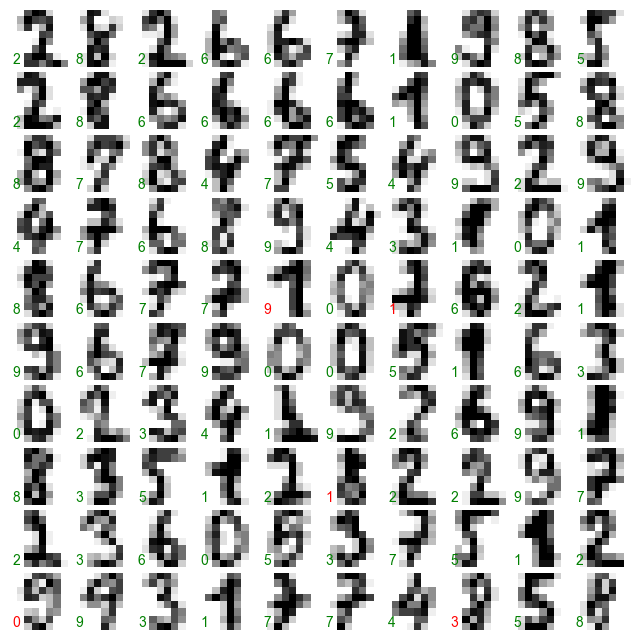

In [6]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.reshape(450,8,8)[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_mod_rf[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_mod_rf[i]) else 'red')

Considerar **sqrt** como features.

In [7]:
mod_rfsqrt = RandomForestClassifier(n_estimators=100, max_features = 'sqrt')
mod_rfsqrt.fit(X_train, y_train)
y_mod_rfsqrt = mod_rfsqrt.predict(X_test)

In [8]:
print("Accuracy: ", accuracy_score(y_test, y_mod_rfsqrt))
print(metrics.classification_report(y_mod_rfsqrt, y_test))
mat = confusion_matrix(y_test, y_mod_rfsqrt)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

Accuracy:  0.98
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      0.93      0.97        46
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       0.98      1.00      0.99        51
          7       1.00      0.98      0.99        49
          8       0.96      0.98      0.97        47
          9       0.98      0.96      0.97        48

avg / total       0.98      0.98      0.98       450



In [9]:
fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.reshape(450,8,8)[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_mod_rfsqrt[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_mod_rfsqrt[i]) else 'red')

**Conclusión:**

El resultado de reducir el hiperparámetro de árboles en el bosque aleatorio manteniendo feautures default tiene acertividad o accuracy de 96%. Modificar el feature a raíz cuadrada pero dejando únicamente 10 árboles disminuye la acertividad a 94%. Si se modifica el número de árboles a 100, entonces la acertividad sube a 98%. 

Por lo tanto, podemos decir que lo mejor es tener un número alto árboles en el modelo. Este método es el mejor para clasificar estos datos.

#### 1b. PCA

In [10]:
mod_pca = PCA(n_components = 2)
mod_pca.fit(X)
print(mod_pca.explained_variance_ratio_) 

x_mod_pca = mod_pca.transform(X)
print(x_mod_pca) 

[ 0.14890594  0.13618771]
[[ -1.2594667   21.27488374]
 [  7.95761093 -20.76869887]
 [  6.99192345  -9.95598668]
 ..., 
 [ 10.80128354  -6.96025223]
 [ -4.87210006  12.42395391]
 [ -0.34438939   6.36554908]]


In [11]:
plt.scatter(x_mod_pca[:,0], x_mod_pca[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('spectral', 10))
plt.colorbar(label = 'etiqueta', ticks = range(10))
plt.clim(-0.5, 9.5)

#### 1c. Isomap

In [12]:
mod_iso = manifold.Isomap(30, 2)
mod_iso.fit(X)
x_mod_iso = mod_iso.transform(X)
print(x_mod_iso) 

[[-67.1698146   -4.04310374]
 [ 40.78068752 -21.1040543 ]
 [ 29.20640276   0.53086363]
 ..., 
 [ 10.2293668   -2.31519887]
 [-14.70774536  29.01346318]
 [-15.57147421  16.84114015]]


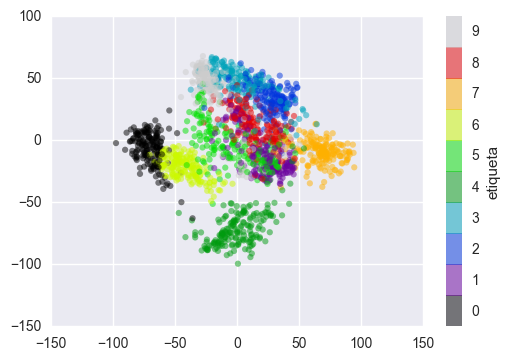

In [13]:
plt.scatter(x_mod_iso[:,0], x_mod_iso[:,1], c=y,
            edgecolor = 'none',
            alpha = 0.5,
            cmap = plt.cm.get_cmap('spectral', 10))
plt.colorbar(label = 'etiqueta', ticks = range(10))
plt.clim(-0.5, 9.5)

**Conclusión:**

Los puntos con el método Isomap en la gráfica de dispersión se ven más separados. Por lo tanto, gráficamente se puede ver que el método Isomap (1c) separa mejor los dígitos que PCA (1b). 

#### 1d. Naive Bayes

In [14]:
mod_nb = GaussianNB()
mod_nb.fit(X_train, y_train)
y_mod_nb = mod_nb.predict(X_test)

# Ajuste
print(accuracy_score(y_test, y_mod_nb))
print(metrics.classification_report(y_mod_nb, y_test))

mat = confusion_matrix(y_test, y_mod_nb)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Valor predicho')
plt.ylabel('Valor real')

0.833333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.91      0.70      0.79        56
          2       0.45      0.95      0.62        21
          3       0.87      0.83      0.85        47
          4       0.82      0.94      0.87        33
          5       0.90      0.98      0.93        44
          6       0.98      1.00      0.99        51
          7       0.98      0.76      0.85        62
          8       0.79      0.55      0.65        69
          9       0.64      1.00      0.78        30

avg / total       0.86      0.83      0.83       450



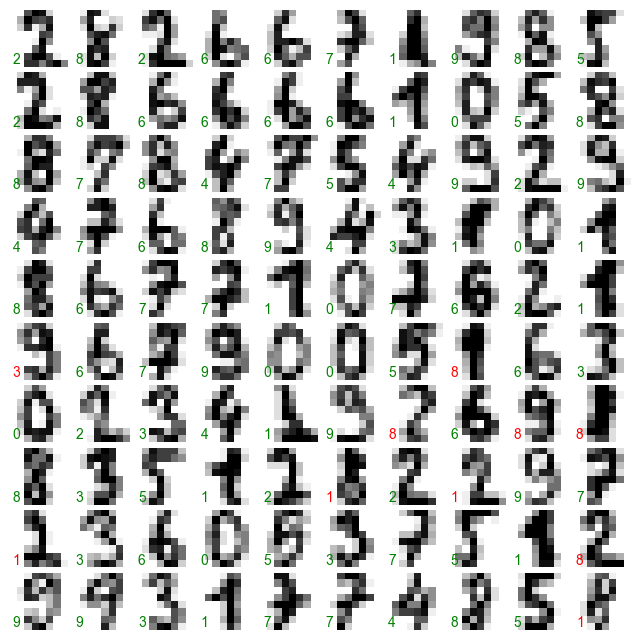

In [15]:
# Gráfica de predicciones
fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test.reshape(450,8,8)[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_mod_nb[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_mod_nb[i]) else 'red')

**Conclusión:**

Con este método, la medida accuracy del modelo es de 83%, a pesar de ser un  método sencillo de clasificación tiene resultados buenos. Es decir, es un buen punto de partida. 

## Selección de atributos

Las funciones para esta sección se llaman `utils.py`. Los archivos feather que se ocuparán más adelante se generan en R, en el documento 04_modelos.Rmd - ejercicio 10, al final del documento. 

In [2]:
import utils as utils
irisdf = feather.read_dataframe("modelos/iris.feather")
diamdf = feather.read_dataframe("modelos/diamonds.feather")

El dataset `diamonds` contiene información sobre la composición y precio de diamantes. Para más información, http://docs.ggplot2.org/0.9.3.1/diamonds.html

In [3]:
diamdf.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

El dataset `iris` contiene información sobre características de flores. Esta base de datos fue construida por Fisher en 1936. Para mayor referencia, 
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [4]:
irisdf.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### Ejercicio 2.

Implementar el método low_variability() en utils.r.


In [5]:
print( diamdf.cut.value_counts())
print( diamdf.groupby('cut')['price'].mean() )
print( diamdf.shape)
diamdf.head()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
cut
Fair         4358.757764
Good         3928.864452
Very Good    3981.759891
Premium      4584.257704
Ideal        3457.541970
Name: price, dtype: float64
(53940, 10)


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

El problema que encontramos en este método es la escala de las variables, dado que en el algoritmo se comparan rangos intercuartílicos que son sensibles a la escala, se propone estandarizar antes las variables.

### Ejercicio 3.

Implementar el método correlation_filtering() en utils.py.


In [6]:
diam_corrf = utils.correlation_filtering(diamdf,'corr>=0.8')
print("Base original: ", diamdf.shape)
print("Base filtrada: ", diam_corrf.shape)
diam_corrf.head()

Base original:  (53940, 10)
Base filtrada:  (53940, 6)


cut color clarity  depth  table  price
0    Ideal     E     SI2   61.5   55.0    326
1  Premium     E     SI1   59.8   61.0    326
2     Good     E     VS1   56.9   65.0    327
3  Premium     I     VS2   62.4   58.0    334
4     Good     J     SI2   63.3   58.0    335

Esta base tiene 3 variables categóricas, por lo que únicamente se consideran 7 variables numéricas en el filtro. En esta base la correlación entre atributos numéricos no es alta, ya que con un filtro de correlación mayor a .8 únicamente obtenemos 3 variables de las 7. 

### Ejercicio 4.

Implementar el método FCB_filtering() en utils.r.
Implementar el método FCB_filtering() en utils.py

In [7]:
from sklearn import preprocessing

# convertir a numerico
le_species = preprocessing.LabelEncoder()
diamdf.cut = le_species.fit_transform(diamdf.cut)

In [8]:
diamdf.head()

carat  cut color clarity  depth  table  price     x     y     z
0   0.23    2     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [26]:
diam_fcb = utils.FCB_filtering(data_in=diamdf,
                                 limit_corr='corr>=.5',
                                 var_objetivo='y')
print("Base original: ", diamdf.shape)
print("Base filtrada: ", diam_fcb.shape)
diam_fcb.head()

10
['z']
9


IndexError: single positional indexer is out-of-bounds

Las variables seleccionadas para este caso son `table`, `depth`y `x`. 

### Ejercicio 5. 

Implementar el método forward_filtering() en utils.py.

In [27]:
vars_fwd = utils.forward_filtering(irisdf, 'Species', 3)
vars_fwd.append('Species')
iris_fwd = irisdf[vars_fwd]

In [28]:
print("Base original: ", irisdf.shape)
print("Base filtrada: ", iris_fwd.shape)
iris_fwd.head()

Base original:  (150, 5)
Base filtrada:  (150, 2)


Petal.Width Species
0          0.2  setosa
1          0.2  setosa
2          0.2  setosa
3          0.2  setosa
4          0.2  setosa

En este caso la selección de variables es fuerte, y la principal variable es
el ancho del pétalo. 

## Error de Clasificación

### Ejercicio 6.

Crea una función para crear la curva ROC, llámala plot_roc y guárdala en utils.py

In [35]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [36]:
utils.plot_roc(y_test,y_score,n_classes)

El modelo es bueno, sin embargo la curva es ligeramente más plana del ideal, está lejos de la clasificación perfecta. El área bajo la curva es de 0.79 lo que indica que es sensible, con el 60% de tasa de verdaderos positivos tengo una tasa de falsos positivos de 40%. 

### Ejercicio 7.

Crea una función para generar la gráfica de precision/recall, llámale plot_prec_rec

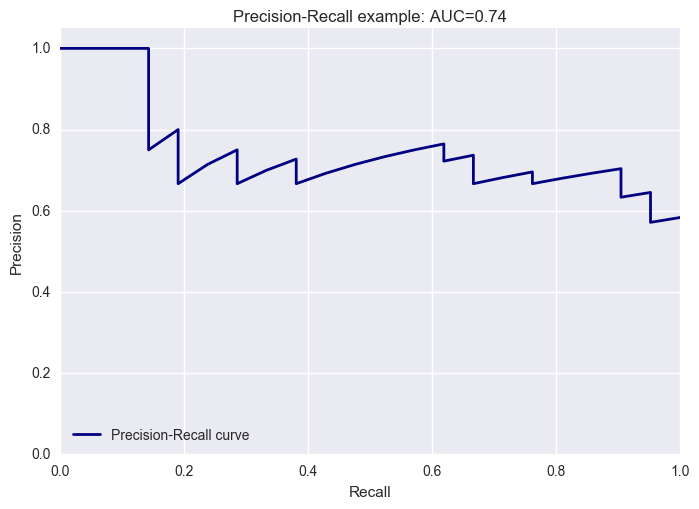

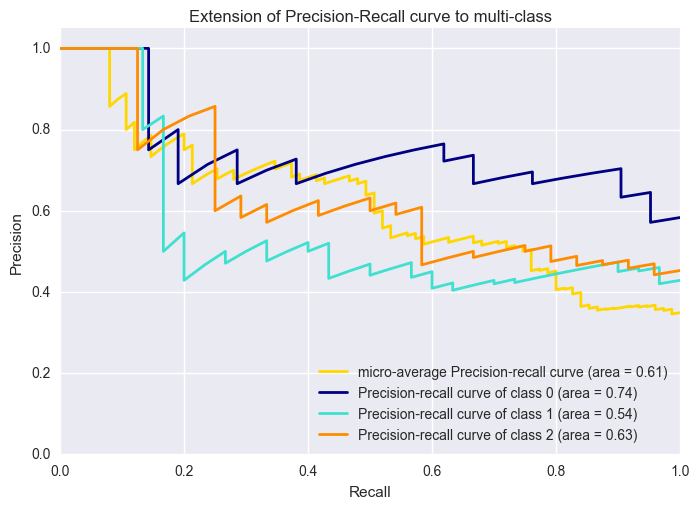

In [37]:
utils.plot_prec_rec(y_test,y_score,n_classes)

En este ejemplo se ve un balance entre las curvas obtenidas con el conjunto de datos de prueba. Pasando el nivel de precision de 80%, la grafica se mantiene semi plana. Sin embargo se puede ver que la clase 1 es la que cuesta más trabajo en clasificar con peor precisión. Un punto de corte que yo elegiría es el 70% de precisión.

### Ejercicio 8.

Crea una función para generar la curva de doble densidad, llámale plot_double_density



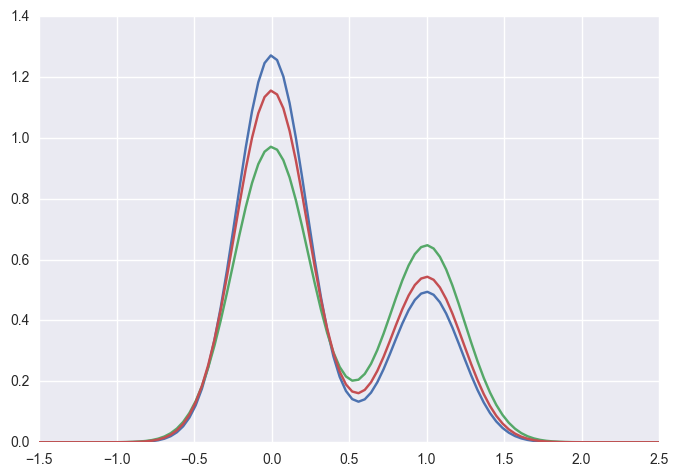

In [40]:
utils.plot_double_density(y_test)

La densidad de las clases no varía de forma importante en localización de la distribución y ligeramente en las zonas con mayor distribución. 

## Grid Search
 

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [51]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [52]:
clsf = RandomForestClassifier()
hyper_param_grid = {'n_estimators': [1,10], 'max_depth': [1,5], 
                    'max_features': ['sqrt','log2'],
                    'min_samples_split': [2,5]}

grid_search = GridSearchCV(clsf, hyper_param_grid, cv = 5, verbose = 1)
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'n_estimators': [1, 10], 'min_samples_split': [2, 5], 'max_depth': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [53]:
y_fit = grid_search.fit(X, y)
print("Mejores parámetros: ",grid_search.best_params_)
print("Mejor calificación: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros:  {'max_features': 'sqrt', 'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 5}
Mejor calificación:  0.9666666666666667


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.1s finished


### Ejercicio 9.

Repite el código anterior pero ahora usa RandomizedSearchCV

In [56]:
grid_randsearch = RandomizedSearchCV(clsf, hyper_param_grid, cv=5, verbose=1)
grid_randsearch

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': ['sqrt', 'log2'], 'n_estimators': [1, 10], 'min_samples_split': [2, 5], 'max_depth': [1, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=1)

In [59]:
y_fit = grid_randsearch.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


In [77]:
print( "Mejores parámetros del árbol de decisión:")
grid_randsearch.best_params_

Mejores parámetros del árbol de decisión:


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 10}

In [79]:
print("Mejor calificación: ", grid_randsearch.best_score_)

Mejor calificación:  0.9666666666666667


In [80]:
y_pred = grid_randsearch.predict(X)
print("Accuracy: ", metrics.accuracy_score(y, y_pred))
print( "Matriz de cofusión:\n", metrics.confusion_matrix(y, y_pred) )
print( "Reporte de clasificación:\n",metrics.classification_report(y, y_pred))

Accuracy:  0.98
Matriz de cofusión:
 [[50  0  0]
 [ 0 49  1]
 [ 0  2 48]]
Reporte de clasificación:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.98      0.97        50
          2       0.98      0.96      0.97        50

avg / total       0.98      0.98      0.98       150



Para este conjunto de datos iris, el mejor modelo de bosques aleatorios de clasificación es el descrito anteriormente, que alcanza un score de 96% y accuracy de 98%. El error de clasificación es bajo y la precisión bastante alta en las tres clases.

### Ejercicio 10.

Abre Rstudio y guarda el data.frame de Titanic y guárdalo como archivo feather y en una base de datos sqlite.

### Ejercicio 11.

Lee desde python la base de datos de Titanic.


**Feather**

In [344]:
import feather
titanic = feather.read_dataframe('modelos/titanicpipe.feather')

In [345]:
print( titanic.shape )
titanic.columns

(2230, 12)


Index(['age', 'Class', 'Ticket', 'Group', 'Joined', 'Job', 'Boat', 'sex',
       'boat_location', 'survived', 'pounds_per_ticket', 'pesos_per_ticket'],
      dtype='object')

**Sqlite3**

In [346]:
import sqlite3

In [347]:
conn = sqlite3.connect('modelos/titanic.sqlite3')
c = conn.cursor()

In [348]:
for row in c.execute('SELECT * FROM titanic limit 4'):
        print (row)

('ALLEN', 'Miss,Elisabeth Walton', 'Miss', '29', '1st Class', '24160', '£211 6s 9d', 211.0, '6s', '9d', None, None, 'Southampton', None, '2', None, 1.0, 'Woman', 29.0, '(24,30]', 'adult', 22366.0, 517772.89999999997)
('ALLISON', 'Mr,Hudson Joshua Creighton', 'Mr', '30', '1st Class', '113781', '£151 16s', 151.0, '16s', None, None, None, 'Southampton', 'Businessman', None, '135', 0.0, 'Man', 30.0, '(24,30]', 'adult', 16006.0, 370538.89999999997)
('ALLISON', 'Mrs,Bessie Waldo', 'Mrs', '25', '1st Class', '113781', '£151 16s', 151.0, '16s', None, None, None, 'Southampton', None, None, None, 0.0, 'Woman', 25.0, '(24,30]', 'adult', 16006.0, 370538.89999999997)
('ALLISON', 'Miss,Helen Loraine', 'Miss', '2', '1st Class', '113781', '£151 16s', 151.0, '16s', None, None, None, 'Southampton', None, None, None, 0.0, 'Woman', 2.0, '[0,6]', 'infant', 16006.0, 370538.89999999997)


In [349]:
conn.close()

## Magic Loop Pipeline

### Ejercicio 12 - 16.

- Crea tu versión del magicloop, pero agrega un parámetro para usar Grid Seach o Random Grid Search, utiliza cross-validation, no hold-out.

- Utilízalo para el dataset de Titanic. Utiliza los siguientes clasificadores: Random Forest, Extra Trees, AdaBoost, Logistic Regression, SVC, Naïve Bayes, Decision Trees, DummyClassifier y KNN.

- Reporta la métrica que vas a usar y el porqué la escogiste. ¿Cuál es el mejor modelo en esa métrica? ¿Utilizaste algún threshold? Presenta las gráficas de prec/rec@k y ROC.

- Compara los tiempos de GridSearch y Random Grid Search (Usa %timeit)

- Modifica tu magic_loop para reescribirlo en términos de Pipeline. Agrega pasos para crear más variables usando polinomios, realiza binning en la edad

In [355]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
titanic.survived = le.fit_transform(titanic.survived)
titanic.Joined = le.fit_transform(titanic.Joined)
titanic.Class = le.fit_transform(titanic.Class)

print(titanic.columns)
titanic.head()

Index(['age', 'Class', 'Ticket', 'Group', 'Joined', 'Job', 'Boat', 'sex',
       'boat_location', 'survived', 'pounds_per_ticket', 'pesos_per_ticket'],
      dtype='object')


age  Class    Ticket  Group  Joined   Job  Boat  sex  boat_location  \
0  2.0      0   24160.0    0.0       4   0.0   9.0  1.0            2.0   
1  2.0      0  113781.0    0.0       4  64.0   0.0  2.0            0.0   
2  2.0      0  113781.0    0.0       4   0.0   0.0  1.0            0.0   
3  1.0      0  113781.0    0.0       4   0.0   0.0  1.0            0.0   
4  1.0      0  113781.0    0.0       4   0.0   3.0  2.0            1.0   

   survived  pounds_per_ticket  pesos_per_ticket  
0         1               53.0          130056.7  
1         0               25.0           61347.5  
2         0               25.0           61347.5  
3         0               25.0           61347.5  
4         1               25.0           61347.5

In [356]:
yy = titanic['survived']
yy.shape
titanic_cf = utils.correlation_filtering(titanic,'corr>=0.5')
titanic_cf.head()

age    Ticket  Group  Joined   Job  Boat  sex  pounds_per_ticket
0  2.0   24160.0    0.0       4   0.0   9.0  1.0               53.0
1  2.0  113781.0    0.0       4  64.0   0.0  2.0               25.0
2  2.0  113781.0    0.0       4   0.0   0.0  1.0               25.0
3  1.0  113781.0    0.0       4   0.0   0.0  1.0               25.0
4  1.0  113781.0    0.0       4   0.0   3.0  2.0               25.0

In [357]:
XX = titanic[['age', 'Class', 'sex', 'Group', 'Joined', 'Job', 'pounds_per_ticket']]
XX.shape

(2230, 7)

In [358]:
# Librerías 
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, dummy
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, OrthogonalMatchingPursuit, RandomizedLogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import ParameterGrid
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import random
import pylab as pl
import matplotlib.pyplot as plt
from scipy import optimize
import time
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import timeit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

KN
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.733894 -   0.2s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.781513 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.792717 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.775910 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.820225 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.829132 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.820728 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


1.0
0.69


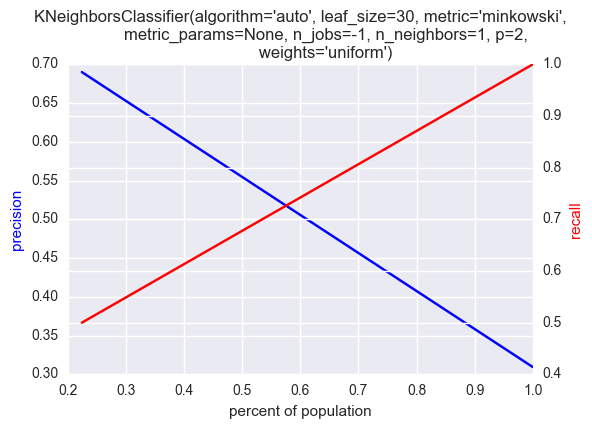

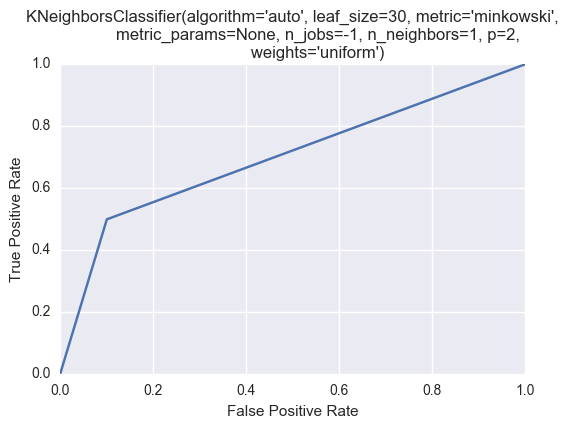

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.733894 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.781513 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.792717 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.775910 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.820225 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.829132 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


0.8
0.875


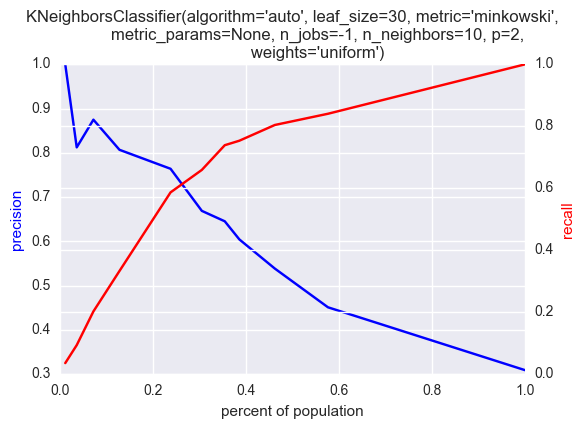

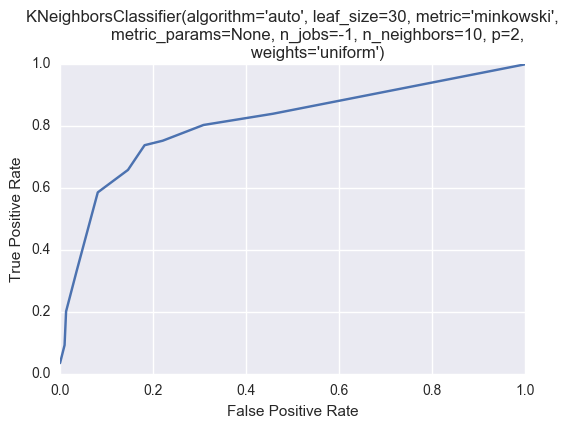

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.733894 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.781513 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.792717 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.775910 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.820225 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.829132 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


1.0
0.69


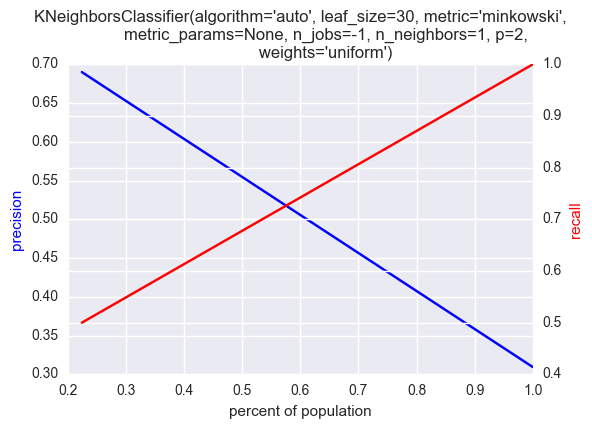

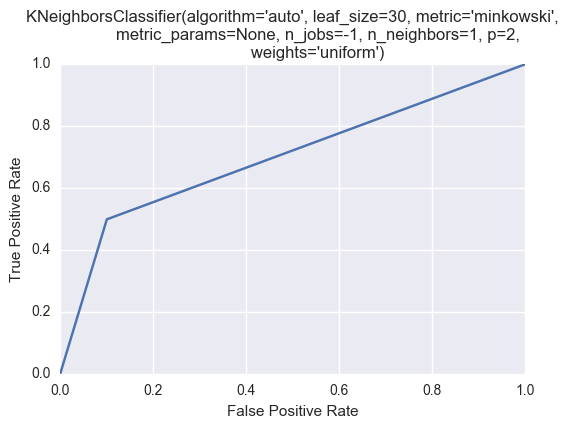

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
           weights='uniform')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.733894 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.781513 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.792717 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.775910 -   0.1s
[CV] clf__n_neighbors=1, clf__n_jobs=-1 ..............................
[CV] ..... clf__n_neighbors=1, clf__n_jobs=-1, score=0.820225 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.829132 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .... clf__n_neighbors=10, clf__n_jobs=-1, score=0.809524 -   0.1s
[CV] clf__n_neighbors=10, clf__n_jobs=-1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


0.8
0.875


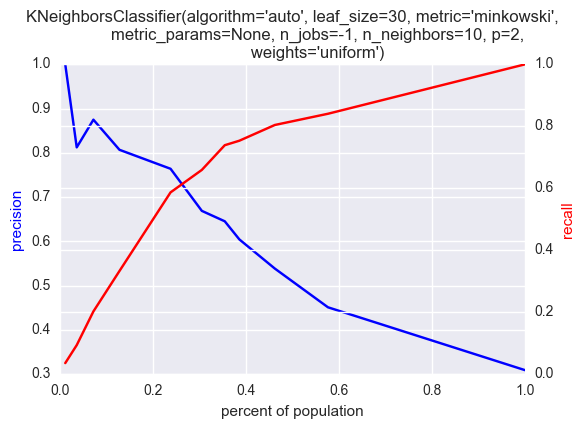

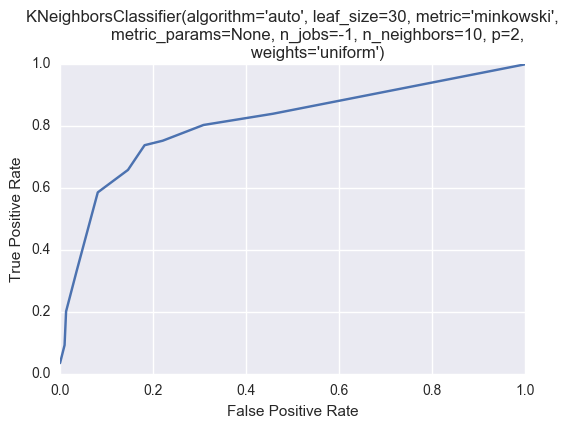

RF
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.781513 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.733146 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.628726287263
0.745098039216


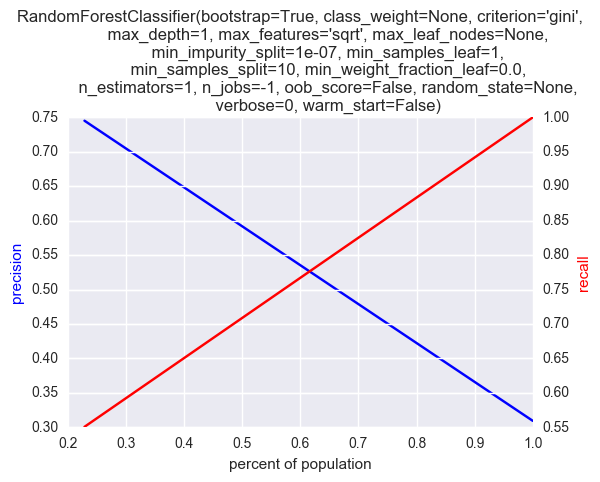

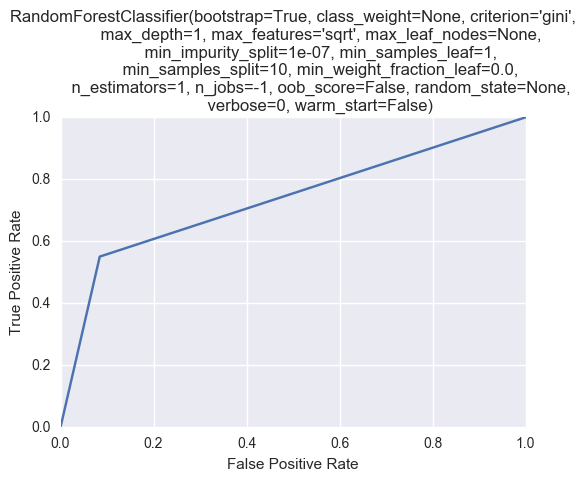

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.812325 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished


0.473476140951
0.978260869565


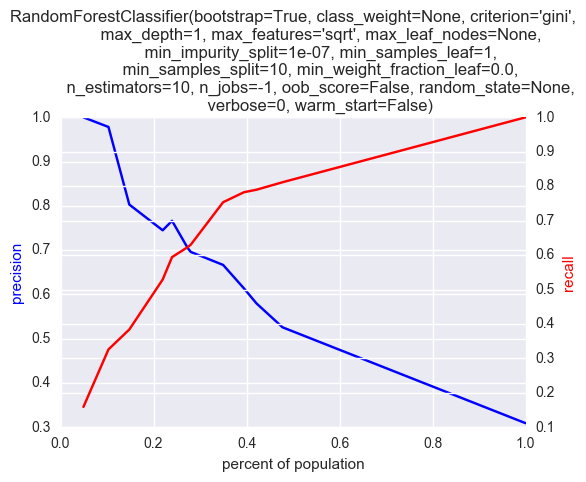

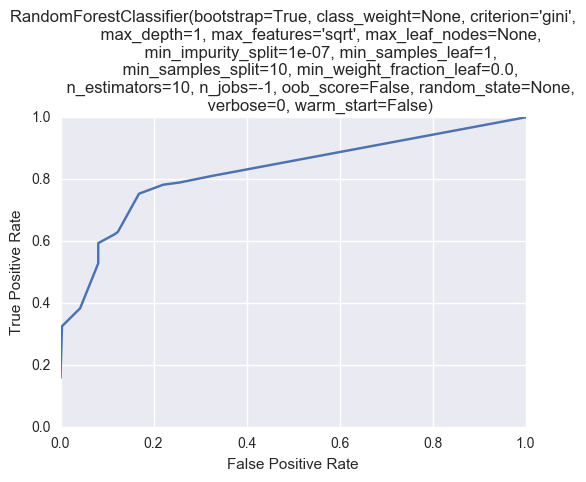

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.767507 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.761905 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.764706 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished


0.914285714286
0.942857142857


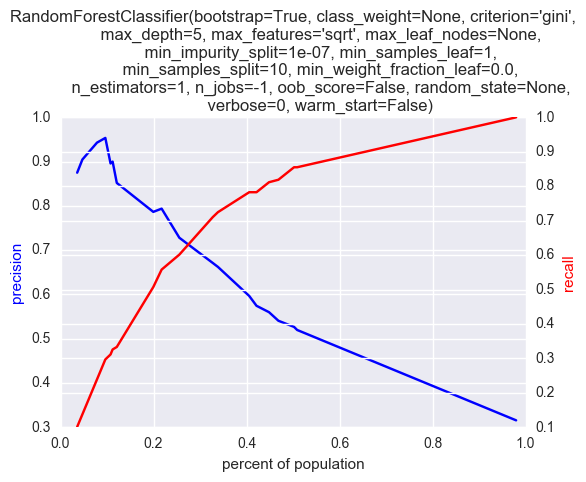

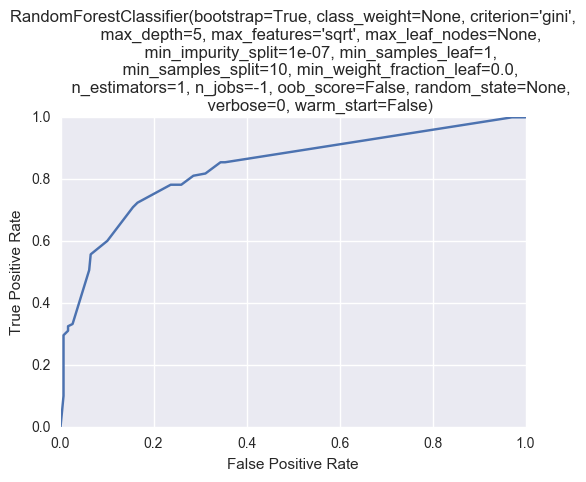

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.781513 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.803922 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.775910 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.764706 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.780899 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.825917573259
1.0


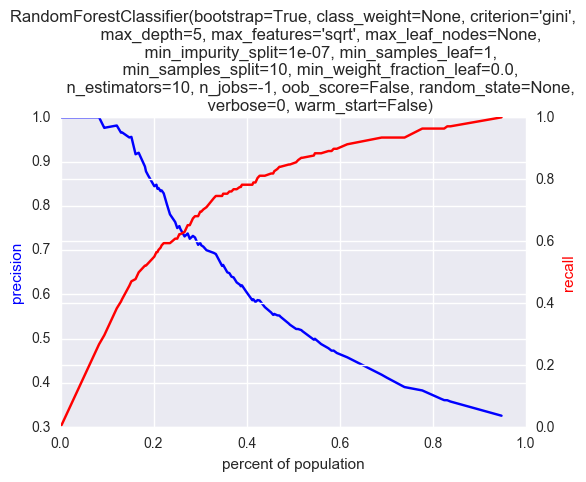

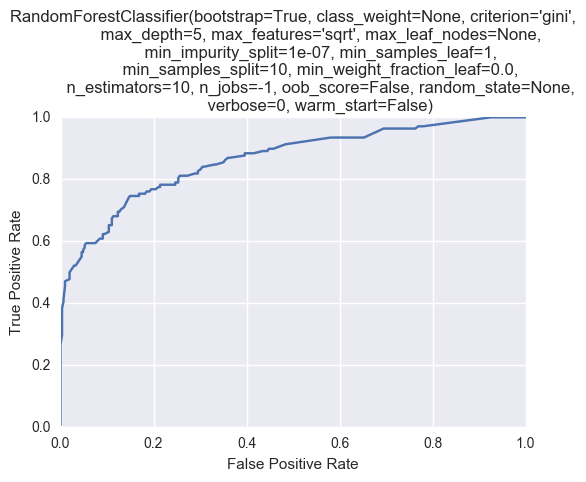

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.761905 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.745098 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.233714285714
0.309417040359


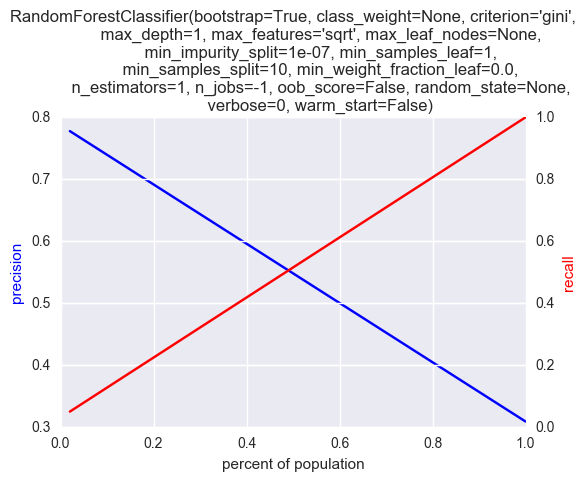

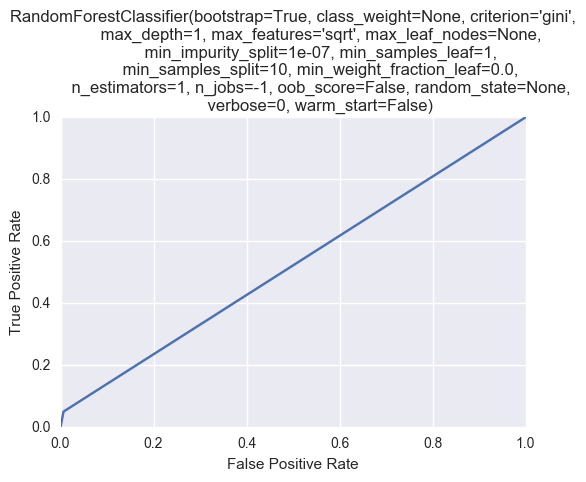

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.767507 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.764706 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.808989 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.48389092544
0.833333333333


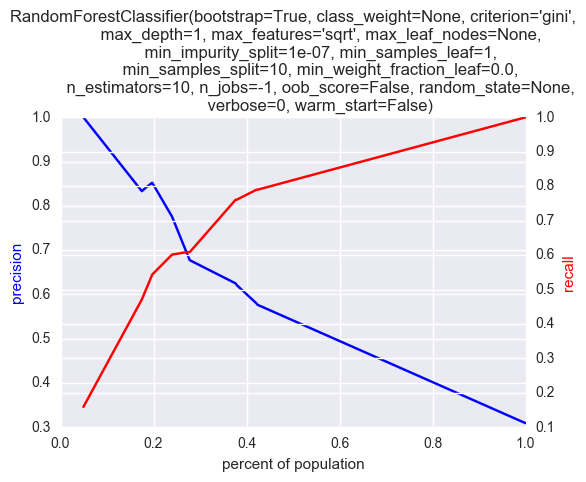

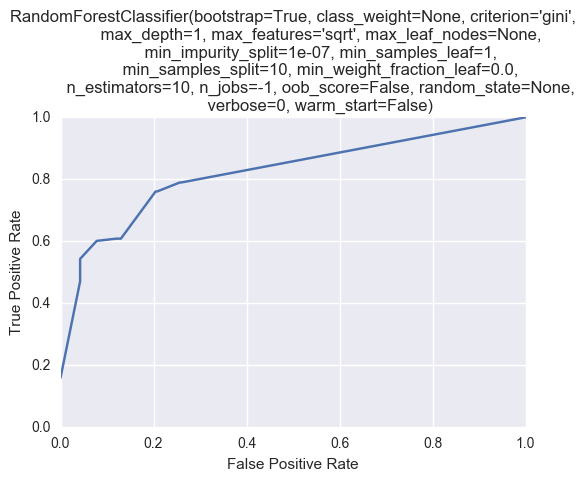

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.767507 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.756303 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.780899 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.913793103448
0.954545454545


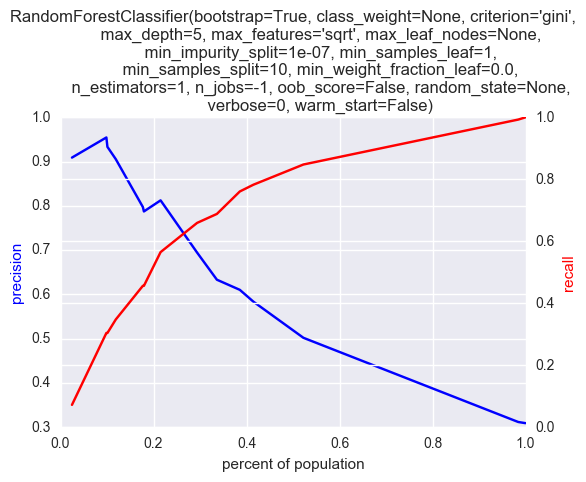

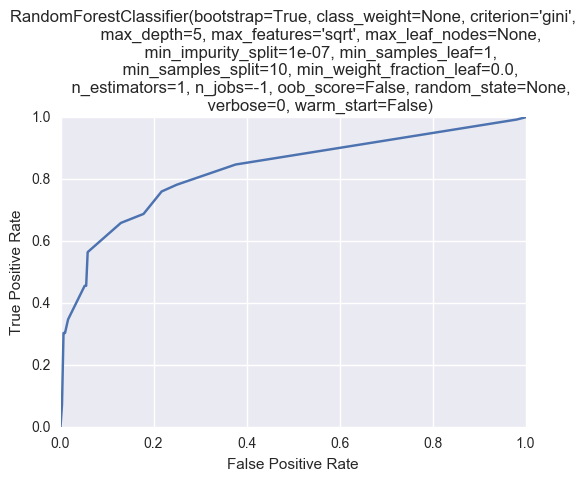

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.884038261222
1.0


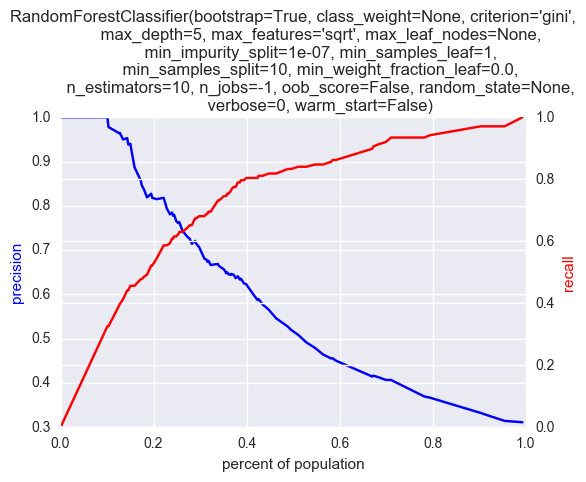

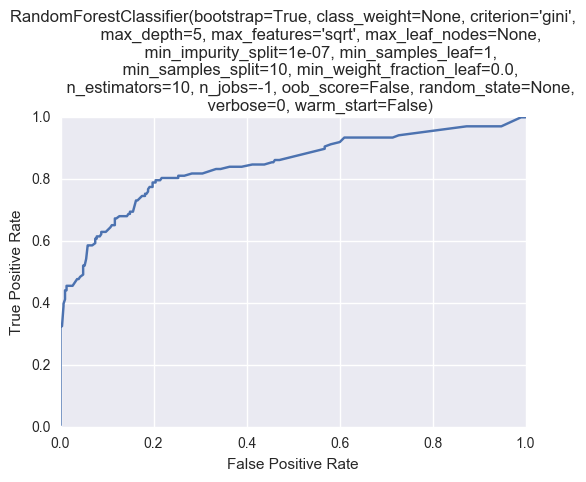

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.770308 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.780899 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.648501362398
0.745098039216


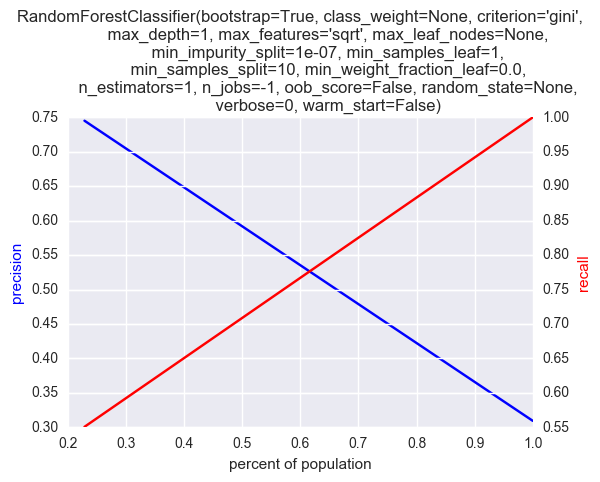

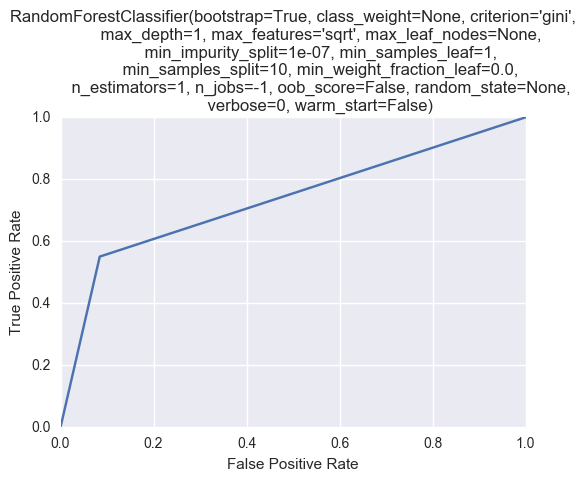

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.814607 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.505755619161
0.866666666667


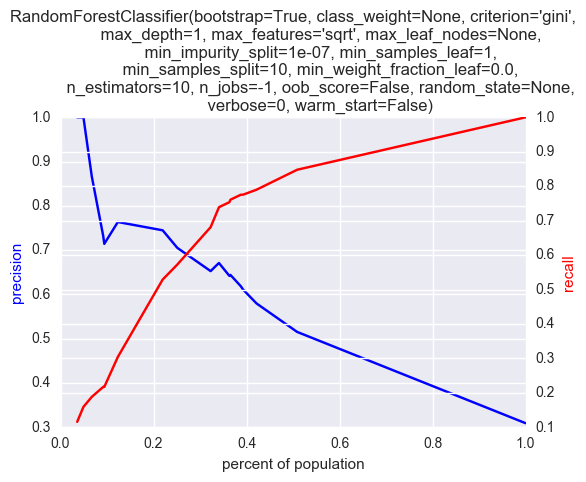

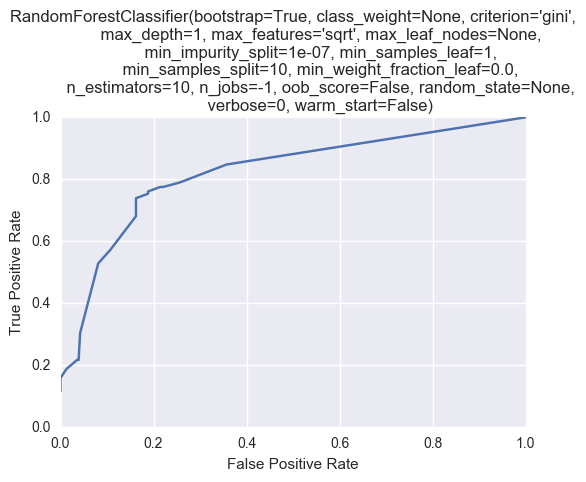

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.736695 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.916666666667
0.966666666667


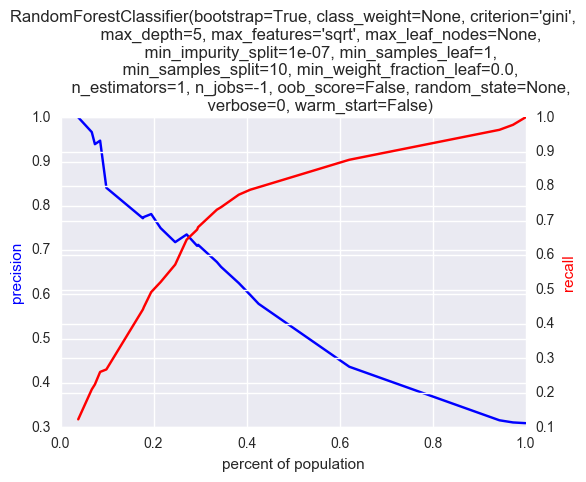

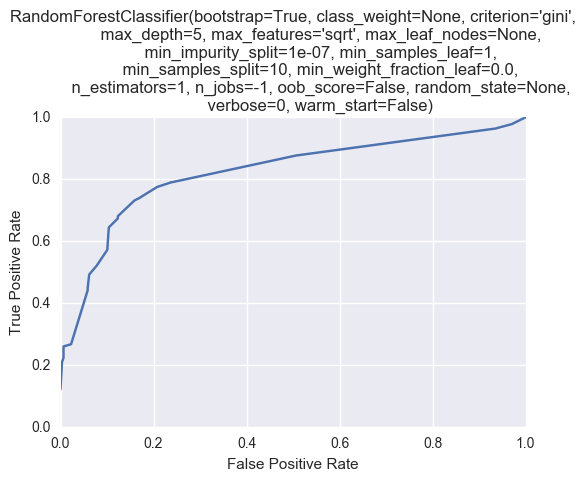

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.803922 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.775910 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.913140975316
1.0


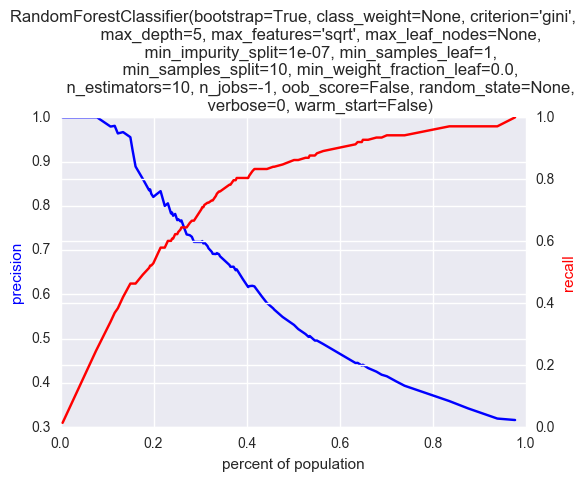

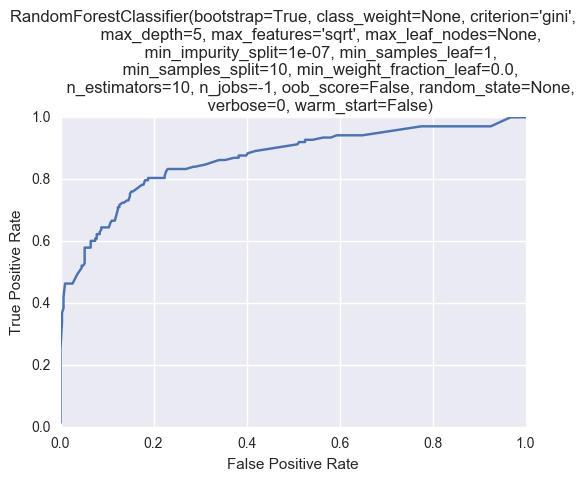

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.761905 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.781513 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.780899 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.2515651679
0.309417040359


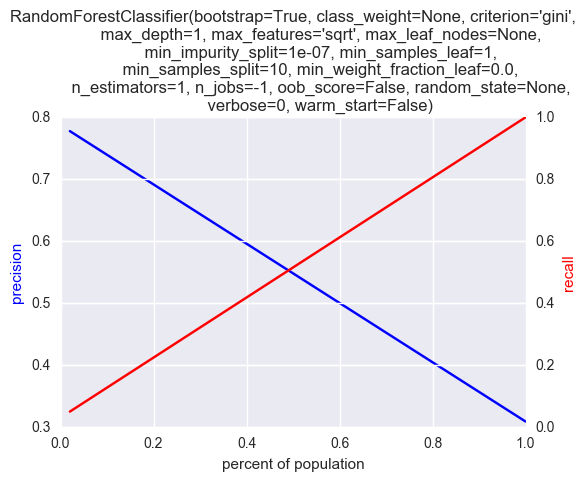

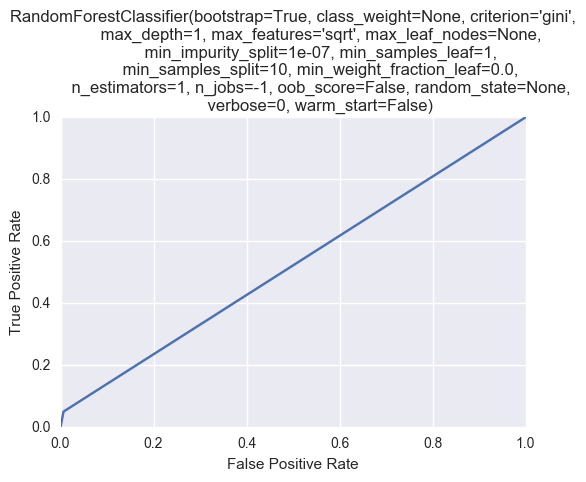

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.803922 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.803922 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.808989 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.542056469358
1.0


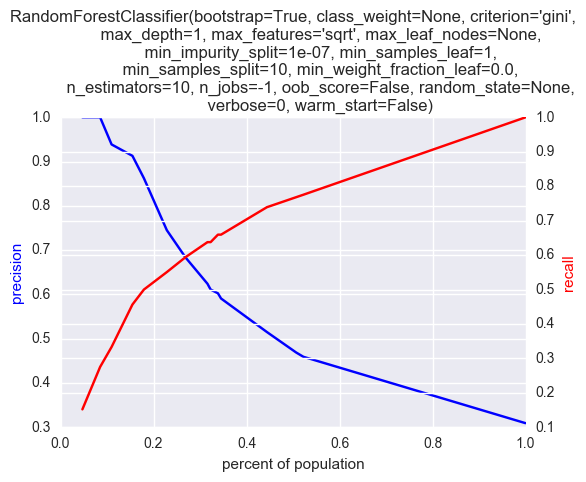

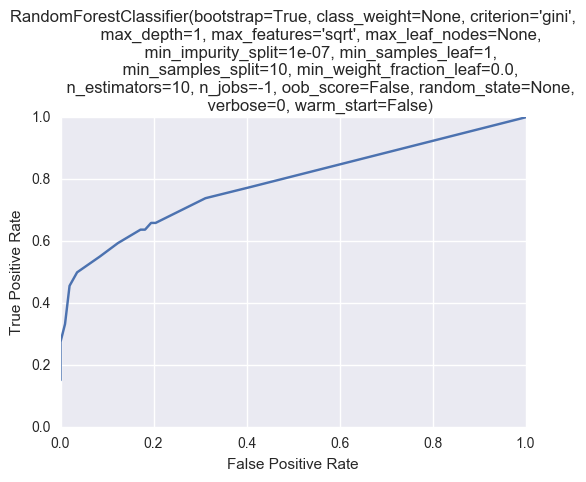

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.761905 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.775910 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.761905 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.848315 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.883720930233
0.928571428571


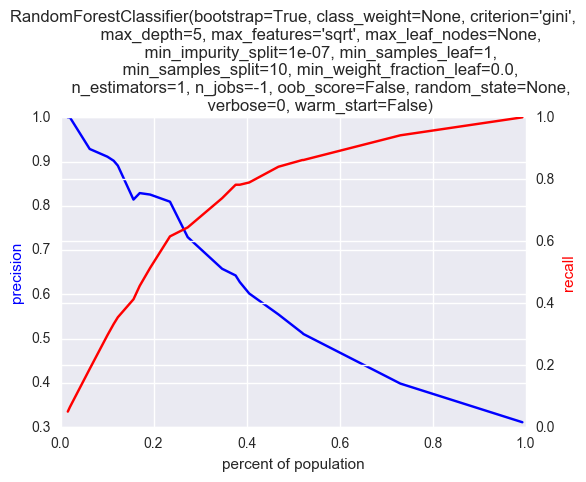

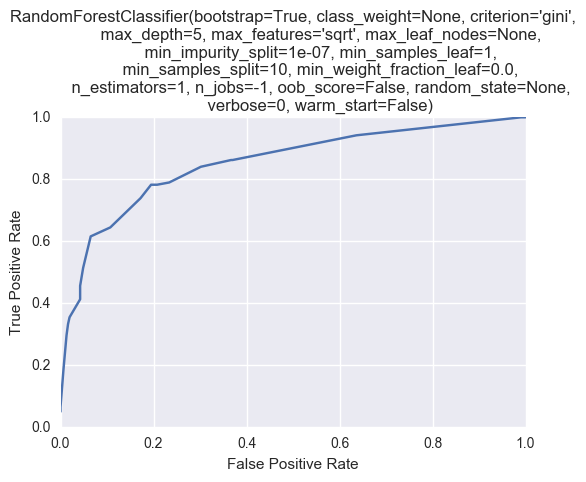

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.770308 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.828652 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.910957683937
1.0


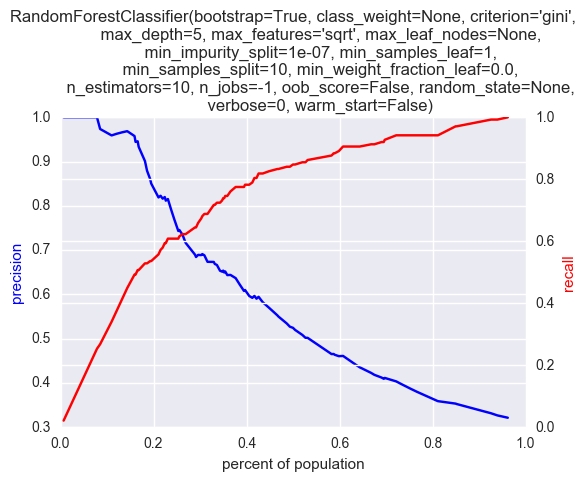

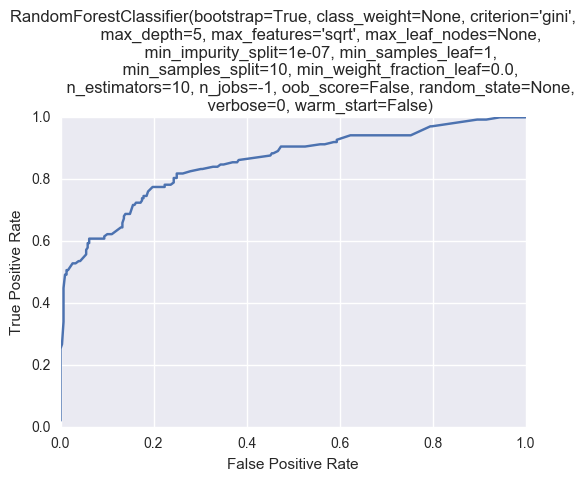

LR
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__solver=sag, clf__n_jobs=-1 .................................


/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ........ clf__solver=sag, clf__n_jobs=-1, score=0.781513 -   0.3s
[CV] clf__solver=sag, clf__n_jobs=-1 .................................
[CV] ........ clf__solver=sag, clf__n_jobs=-1, score=0.759104 -   0.1s
[CV] clf__solver=sag, clf__n_jobs=-1 .................................


/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........ clf__solver=sag, clf__n_jobs=-1, score=0.781513 -   0.2s
[CV] clf__solver=sag, clf__n_jobs=-1 .................................
[CV] ........ clf__solver=sag, clf__n_jobs=-1, score=0.787115 -   0.1s
[CV] clf__solver=sag, clf__n_jobs=-1 .................................


/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


[CV] ........ clf__solver=sag, clf__n_jobs=-1, score=0.780899 -   0.2s


/usr/local/var/pyenv/versions/3.5.2/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.703922075061
0.782608695652


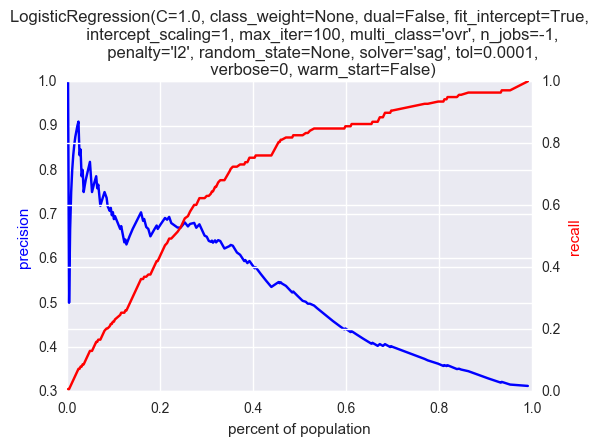

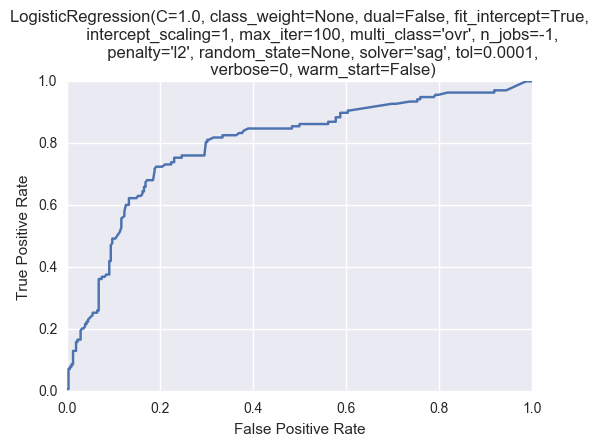

ET
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.756303 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.266919671094
0.334183673469


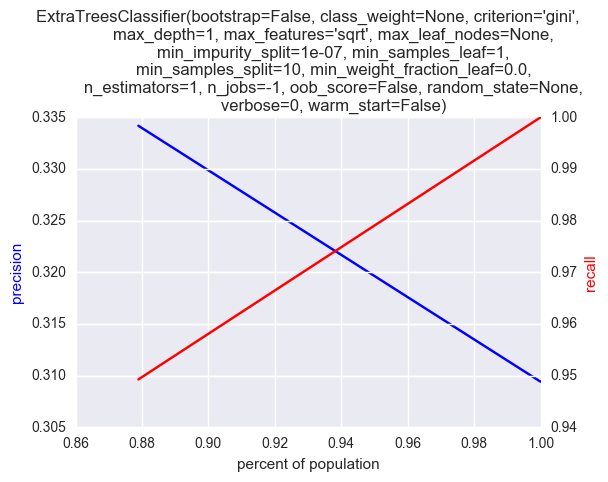

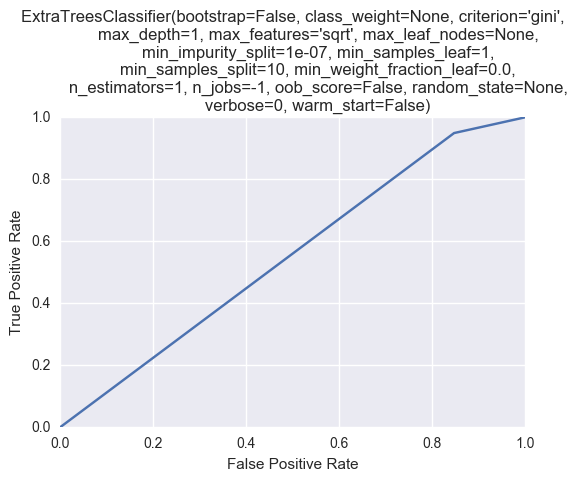

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.780899 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.447434009907
0.893617021277


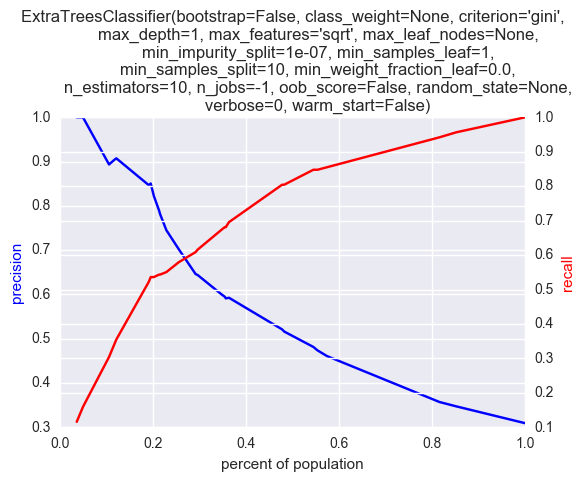

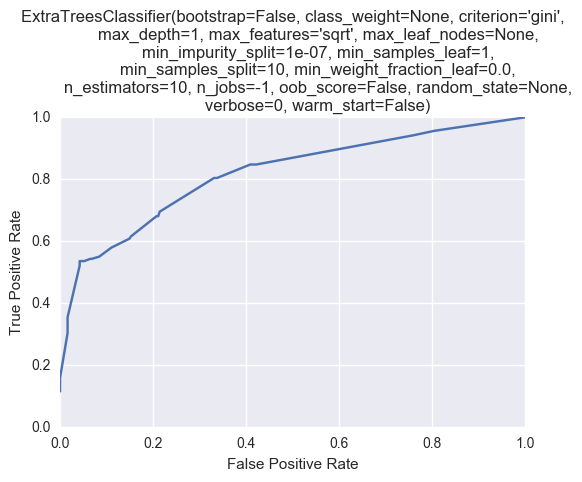

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.805194805195
0.970588235294


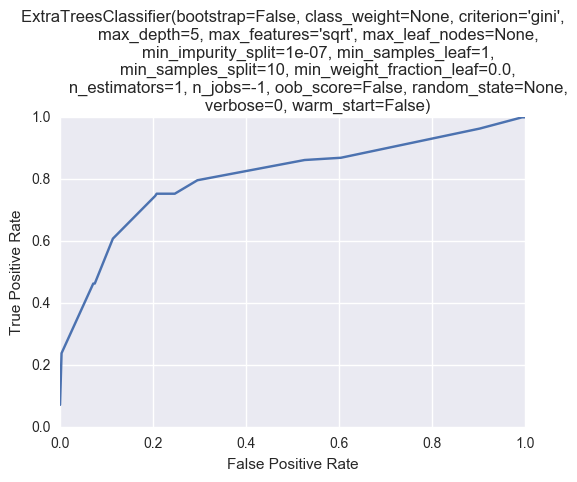

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.809502503378
1.0


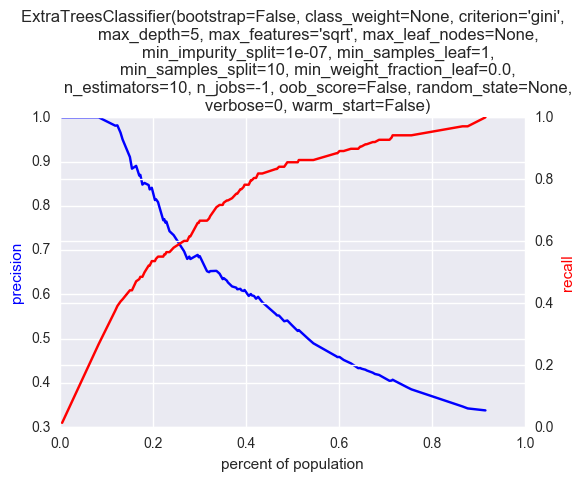

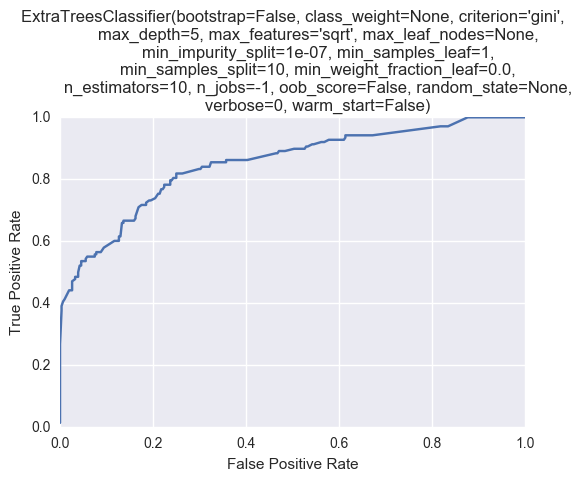

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.244354371743
0.309417040359


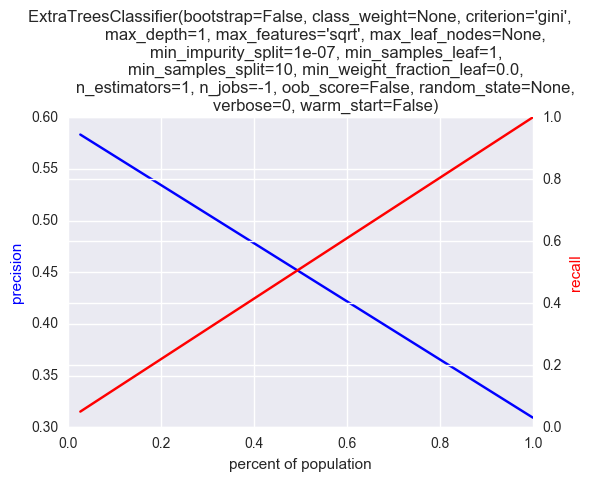

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.781513 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.786517 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.379847954875
0.95652173913


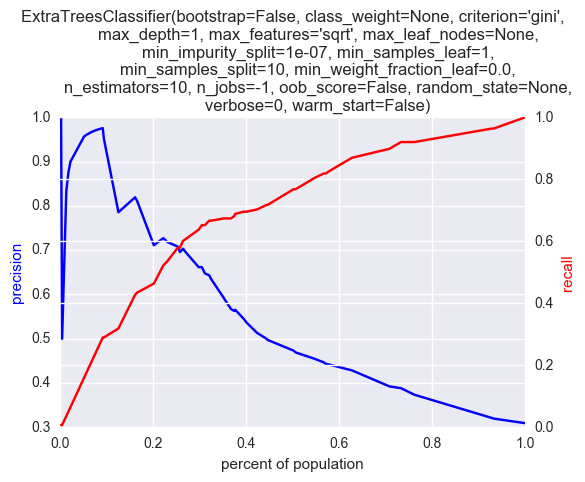

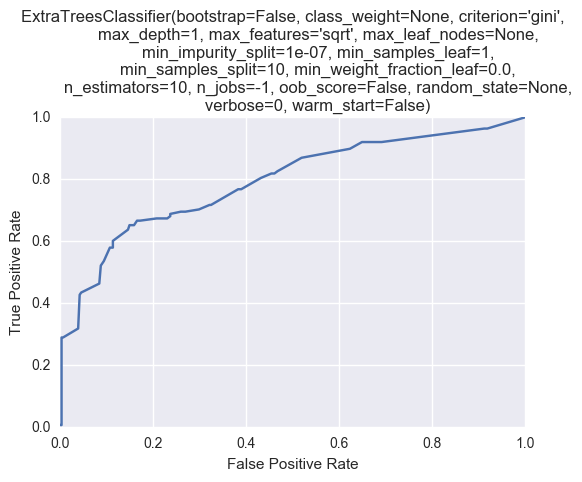

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.532584269663
0.611111111111


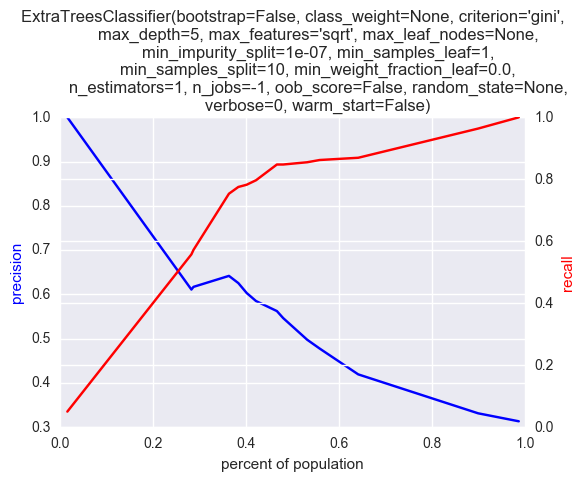

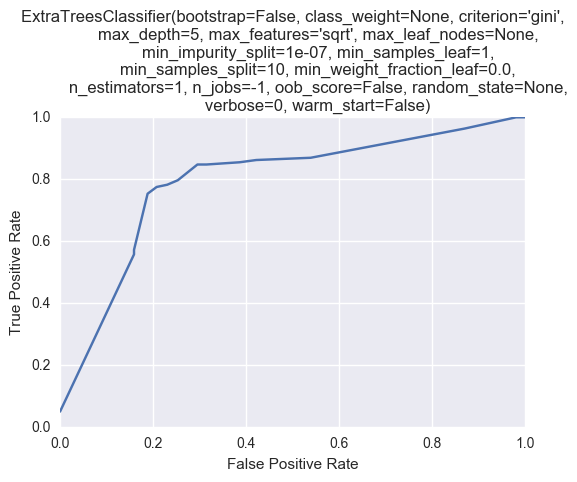

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.798319 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.789867569632
1.0


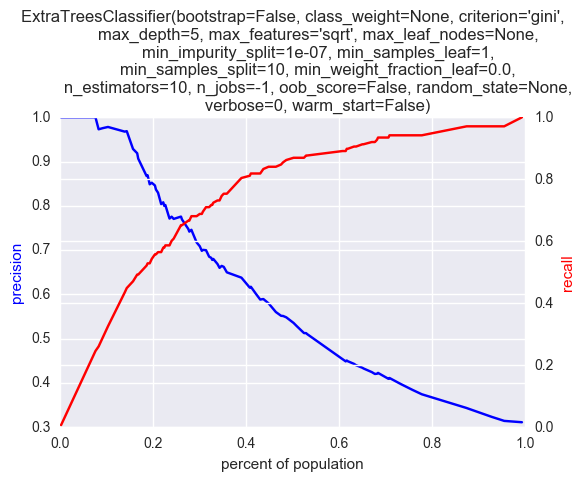

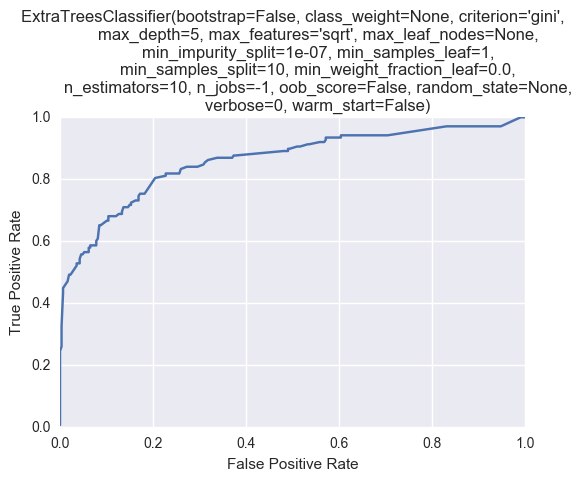

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.784314 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.24985931345
0.312925170068


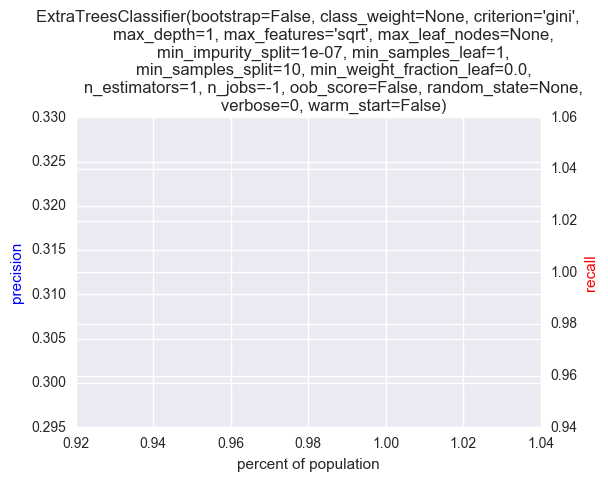

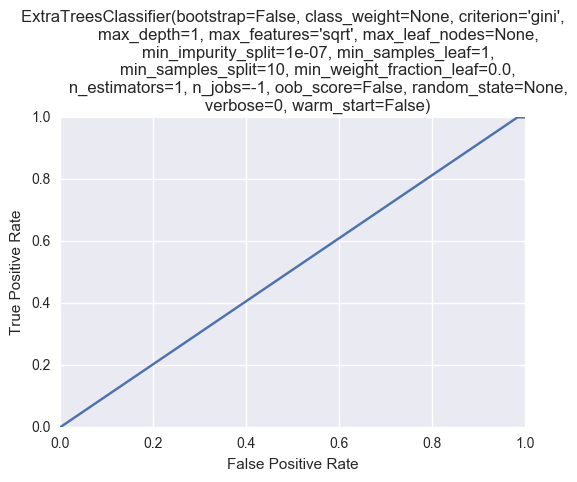

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.798319 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.392857747834
0.961538461538


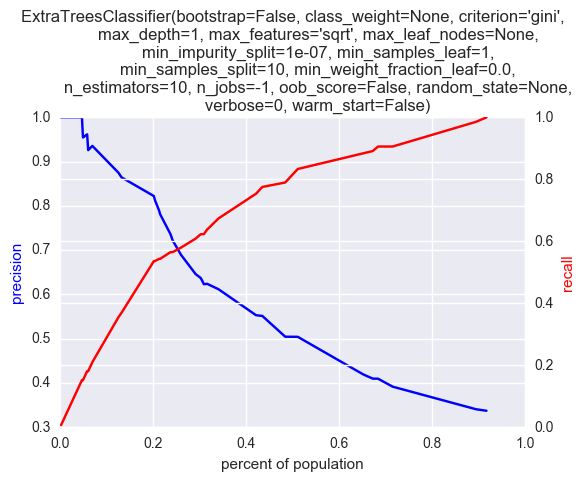

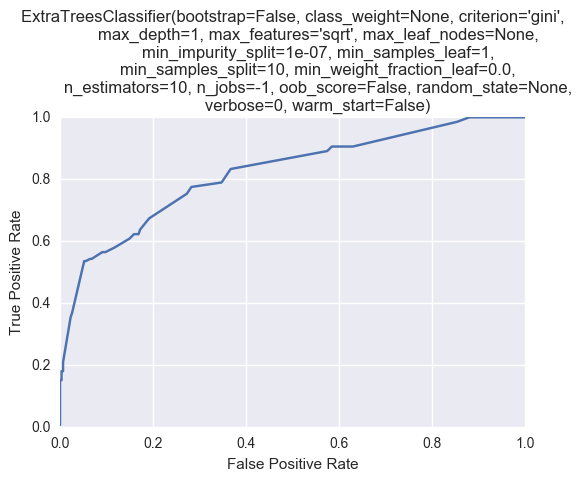

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.953488372093
1.0


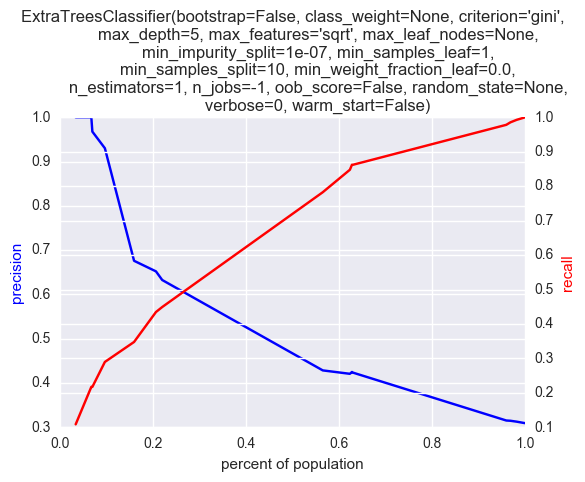

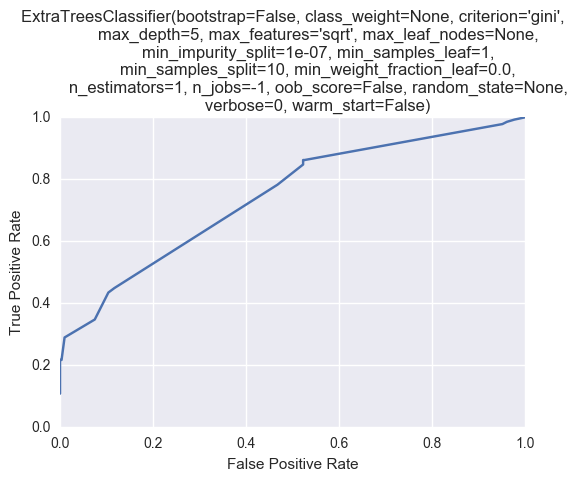

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.747899 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.778711 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.756303 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.733146 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.827384743181
1.0


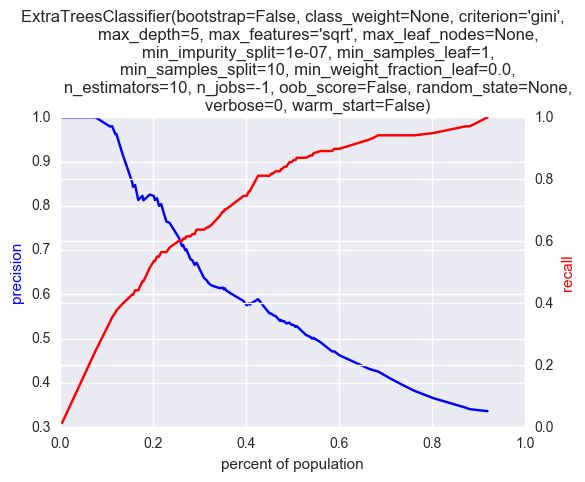

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.828652 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.645077720207
0.745098039216


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.809524 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.773109 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.783708 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.45419089967
1.0


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.803922 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.731092 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.745098 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.803371 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.647058823529
0.788235294118


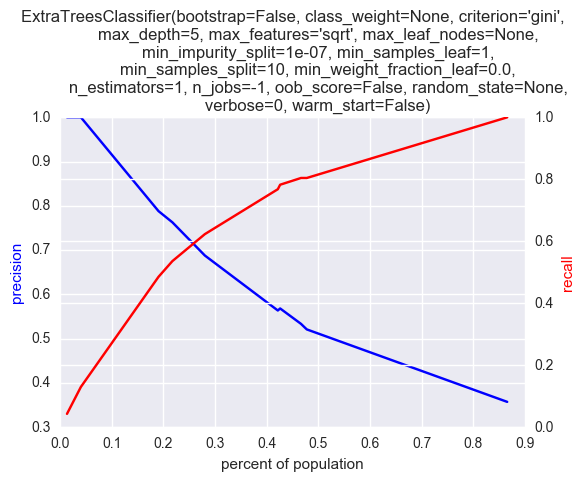

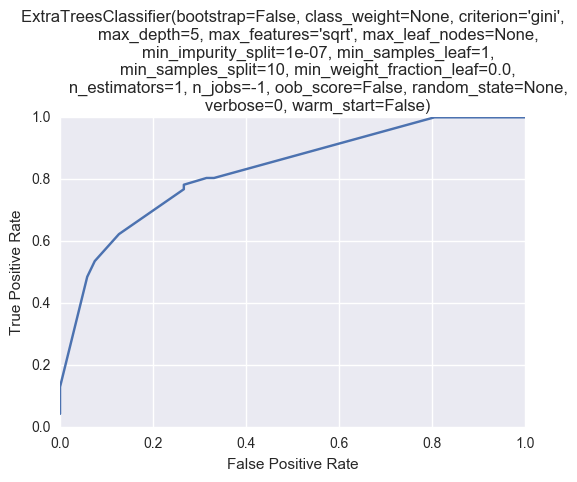

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.831933 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.750700 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.823529 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.820728 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=1, score=0.752809 -   0.1s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, clf__n_jobs=-1, clf__n_estimators=10 
[CV]  clf__

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


0.746748932131
1.0


AB
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.781513 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.770308 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.773109 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.764706 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.808989 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... clf__n_estimators=10, score=0.803922 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.823034 -   0.0s
0.645077720207
0.745098039216


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.781513 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.770308 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.773109 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.764706 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.808989 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_es

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... clf__n_estimators=10, score=0.803922 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.823034 -   0.0s
0.541540620798
1.0


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


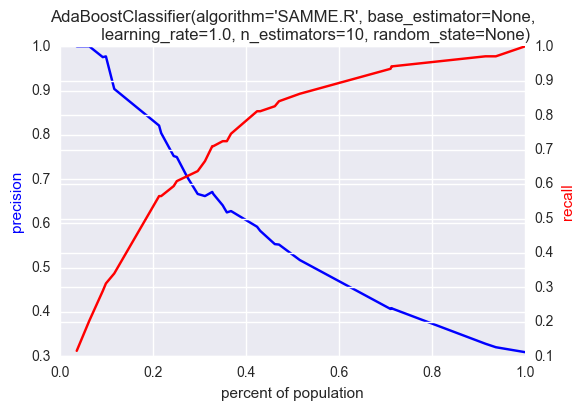

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=None)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.781513 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.770308 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.773109 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.764706 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.808989 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_e

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... clf__n_estimators=10, score=0.803922 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.823034 -   0.0s
0.645077720207
0.745098039216


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


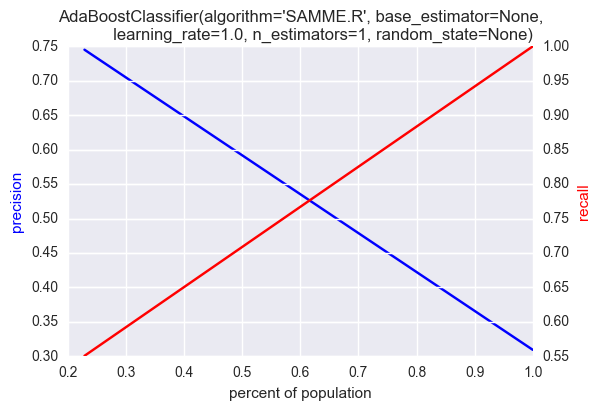

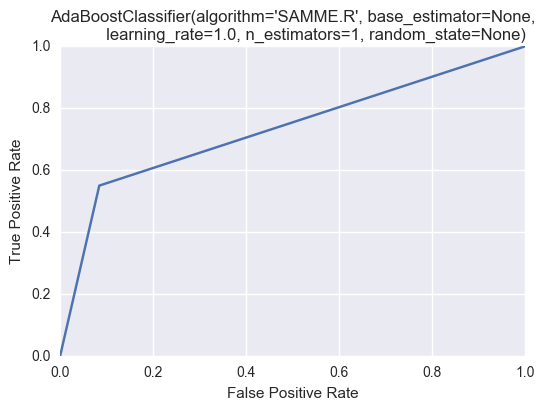

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=None)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.781513 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.770308 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.773109 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.764706 -   0.0s
[CV] clf__n_estimators=1 .............................................
[CV] .................... clf__n_estimators=1, score=0.808989 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_e

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... clf__n_estimators=10, score=0.803922 -   0.0s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.823034 -   0.0s
0.541540620798
1.0


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


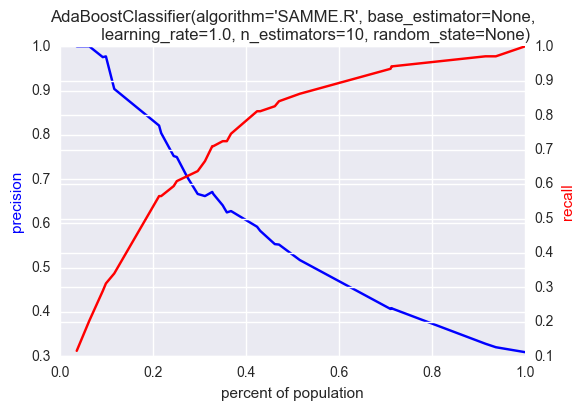

GNB
GaussianNB(priors=None)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ....................................... , score=0.815126 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.792717 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.801120 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.778711 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.823034 -   0.0s
0.999550784916
0.782608695652


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


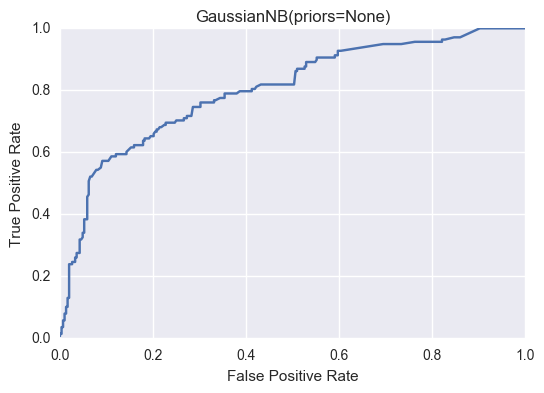

BNB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ....................................... , score=0.789916 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.767507 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.770308 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.764706 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.803371 -   0.0s
0.904919493388
0.714285714286


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


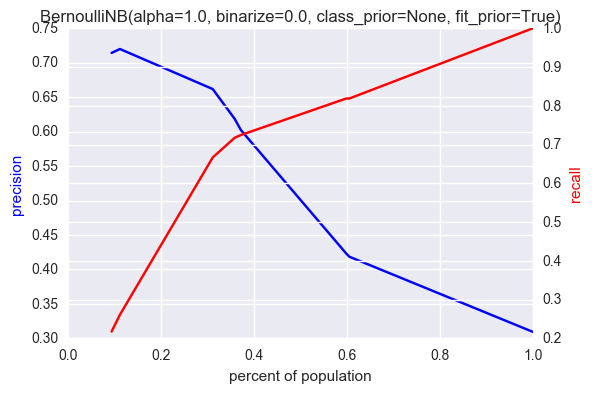

DT
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.801120 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.759104 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.773109 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


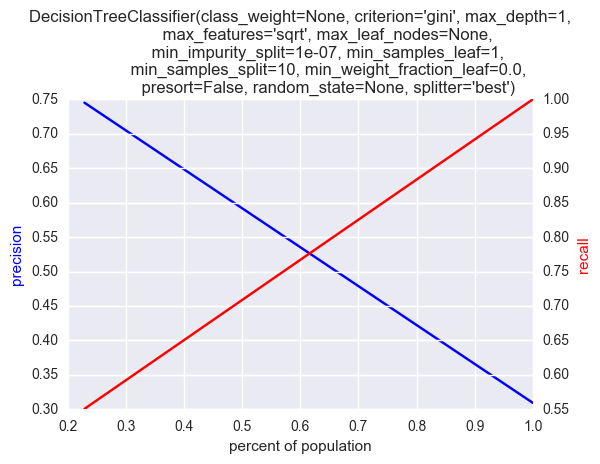

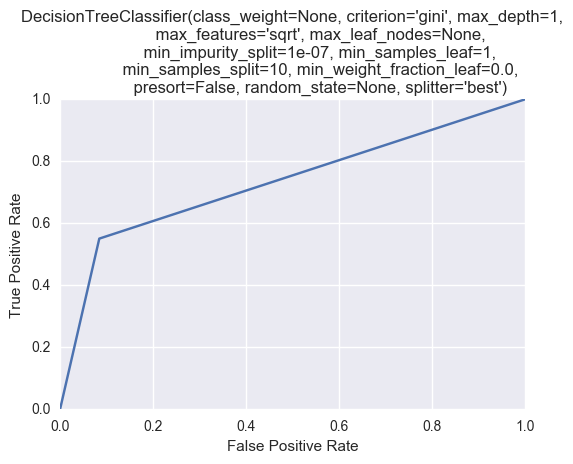

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.784314 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.770308 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.778711 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, cl

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


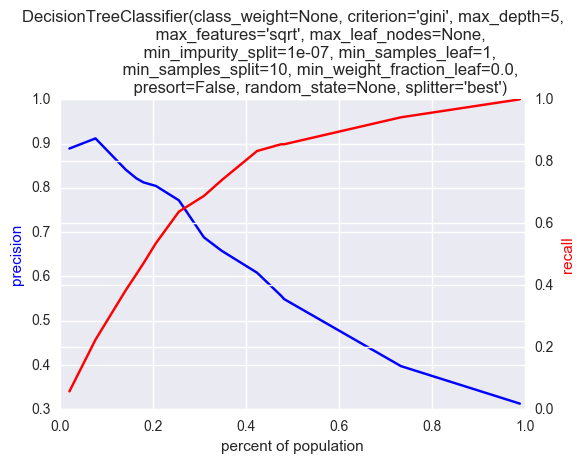

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.831933 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.767507 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.778711 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, cl

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.750700 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.809524 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1, score=0.823529 -   0.0s
[CV] clf__min_samples_split=10, clf__max_features=sqrt, clf__max_depth=1 
[CV]  clf__min_samples_split=10, cl

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


DC
DummyClassifier(constant=None, random_state=None, strategy='stratified')
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ....................................... , score=0.635854 -   0.2s
[CV]  ................................................................
[CV] ....................................... , score=0.616246 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.610644 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.672269 -   0.0s
[CV]  ................................................................
[CV] ....................................... , score=0.620787 -   0.0s
1
0.269230769231


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


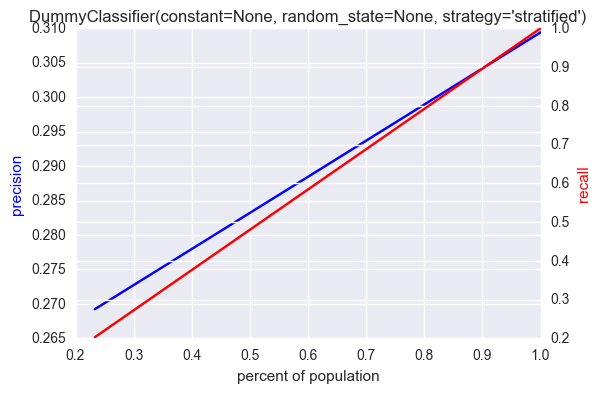

In [359]:
# Función de Pipeline

def define_clfs_params():

    classifiers = {
        'RF': RandomForestClassifier(),
        'LR': LogisticRegression(),
        'ET': ExtraTreesClassifier(),
        'AB': AdaBoostClassifier(),
        'RLR': RandomizedLogisticRegression(),
        'SVC': svm.SVC(),
        'GNB': GaussianNB(),
        'MNB': MultinomialNB(),
        'BNB': BernoulliNB(),
        'DT': DecisionTreeClassifier(),
        'DC': dummy.DummyClassifier(),
        'KN': KNeighborsClassifier()
     }

    grid = {
        'RF': {'n_jobs': [-1],
               'n_estimators': [1,10],
               'max_depth': [1,5],
               'max_features': ['sqrt'],
               'min_samples_split': [10]},
        'LR': {'n_jobs': [-1], 
               'solver': ['sag']},
        'ET': {'n_jobs': [-1],
               'n_estimators': [1,10],
               'max_depth': [1,5],
               'max_features': ['sqrt'],
               'min_samples_split': [10]},
        'AB': {'n_estimators': [1,10]},
        'RLR': {'n_jobs': [-1]},
        'SVC': {'probability': ['True'], 
                'random_state': [0],
                'C':[1,10],
                'kernel':['linear']},
        'GNB': {},
        'MNB': {},
        'BNB': {},
        'DT': {'max_depth': [1,5],
               'max_features': ['sqrt'],
               'min_samples_split': [10]},
        'DC': {},
        'KN': {'n_neighbors': [1, 10],
               'n_jobs': [-1]}
    }

    
    grid2 = {
        'RF': {'clf__n_jobs': [-1],
               'clf__n_estimators': [1,10],
               'clf__max_depth': [1,5],
               'clf__max_features': ['sqrt'],
               'clf__min_samples_split': [10]},
        'LR': {'clf__n_jobs': [-1], 
               'clf__solver': ['sag']},
        'ET': {'clf__n_jobs': [-1],
               'clf__n_estimators': [1,10],
               'clf__max_depth': [1,5],
               'clf__max_features': ['sqrt'],
               'clf__min_samples_split': [10]},
        'AB': {'clf__n_estimators': [1,10]},
        'RLR': {'clf__n_jobs': [-1]},
        'SVC': {'clf__probability': ['True'], 
                'clf__random_state': [0],
                'clf__C':[1,10],
                'clf__kernel':['linear']},
        'GNB': {},
        'MNB': {},
        'BNB': {},
        'DT': {'clf__max_depth': [1,5],
               'clf__max_features': ['sqrt'],
               'clf__min_samples_split': [10]},
        'DC': {},
        'KN': {'clf__n_neighbors': [1, 10],
               'clf__n_jobs': [-1]}
    }

    return classifiers, grid, grid2


def clf_loop(models_to_run, clfs, grid, grid2, X, y, grid_srch):
    
    for n in range(1, 2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        
        for index,clf in enumerate([clfs[x] for x in models_to_run]):
            print (models_to_run[index])
            parameter_values = grid[models_to_run[index]]
            param_values = grid2[models_to_run[index]]
            
            for p in ParameterGrid(parameter_values):
                for ps in ParameterGrid(param_values):
                    try:
                        clf.set_params(**p)
                        print (clf)                    
                    
                        estimators = [('PF', PolynomialFeatures(2)), ('clf', clf)]
                        pipe = Pipeline(estimators)
                    
                        pipe.set_params(**ps)
                    
                        grid_search = grid_srch(pipe, param_values, verbose = 3, cv = 5)
                    
                        grid_search.fit(X_train, y_train)
                        grid_search.predict(X_test)
                        grid_search.score(X_test, y_test)
                        grid_search.best_params_
                    
                        y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
                        threshold = np.sort(y_pred_probs)[::-1][int(.05*len(y_pred_probs))]
                        print (threshold)
                        print (precision_at_k(y_test,y_pred_probs,.05))
                        plot_precision_recall_n(y_test,y_pred_probs,clf)
                        plot_roc(y_test, y_pred_probs, clf)
                    except IndexError:
                        print ('Error:',e)
                        continue



def plot_precision_recall_n(y_true, y_prob, model_name):
    from sklearn.metrics import precision_recall_curve
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    name = model_name
    plt.title(name)
    #plt.savefig(name)
    plt.show()

    
def plot_roc(y_true, y_prob, model_name):
    
    y_score = y_prob

    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    
    plt.figure()
    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    
    name = model_name
    plt.title(name)
    plt.show()

    
    
def precision_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])
    return metrics.precision_score(y_true, y_pred)


def main(): 
    clfs, grid, grid2 = define_clfs_params()
    models_to_run=['KN','RF','LR','ET','AB','GNB', 'BNB', 'DT', 'DC']
    grid_srch = GridSearchCV
    
    X = XX
    y = yy
    clf_loop(models_to_run, clfs,grid, grid2, X,y, grid_srch)
    
if __name__ == '__main__':
    main()